In [7]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [11]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [14]:
train.shape

(31962, 3)

In [16]:
def remove_pattern(input, pattern):
    r = re.findall(pattern, input)
    for i in r:
        input = re.sub(i, "", input)
    
    return input

#re.sub overview:

re.sub(pattern, repl, string, count=0, flags=0):
Return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl. If the pattern isn’t found, string is returned unchanged.

In [20]:
train["cleaned_tweets"] = np.vectorize(remove_pattern)(train["tweet"],"@[\w]*")

 This string “@[\w]*” is passed as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [22]:
# removing special characters, numbers, punctuations

train['cleaned_tweets'] = train['cleaned_tweets'].str.replace("[^a-zA-Z#]", " ")

In [25]:
train["cleaned_tweets"] = train["cleaned_tweets"].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))

Removed all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [26]:
train.tail()

,id,label,tweet,cleaned_tweets
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwaves trying wrap herself mantl...
31959,31960,0,listening to sad songs on a monday morning otw...,listening songs monday morning work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised #calgary #wso condemns
31961,31962,0,thank you @user for you follow,thank follow


In [27]:
train["cleaned_tweets"] = train["cleaned_tweets"].apply(lambda x:x.split())

In [28]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In [29]:
train["cleaned_tweets"] = train["cleaned_tweets"].apply(lambda x: [stemmer.stem(i) for i in x])

In [30]:
train.head()

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,"[when, father, dysfunct, selfish, drag, kid, i..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, #lyft, credit, caus, they, offer, whee..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[#model, love, take, with, time]"
4,5,0,factsguide: society now #motivation,"[factsguid, societi, #motiv]"


In [31]:
train["cleaned_tweets"] = train["cleaned_tweets"].apply(lambda x : " ".join(x))

In [32]:
train.head()

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


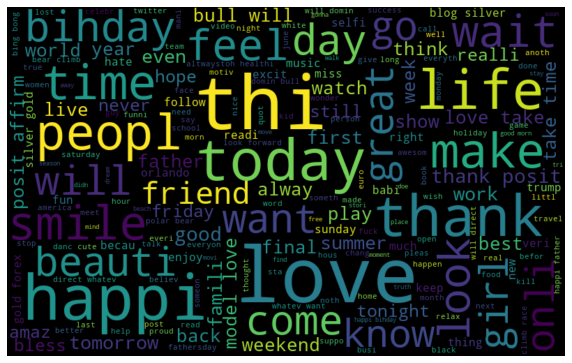

In [34]:
all_words = ' '.join([text for text in train['cleaned_tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
# Bag of words

from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train["cleaned_tweets"])

In [40]:
# modeling


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5353283458021613